In [69]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [55]:
(X_train, y_train), (X_test, y_test) =  datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [56]:
X_test.shape

(10000, 32, 32, 3)

In [57]:
y_train[:5] #2D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [58]:
y_train = y_train.reshape(-1,)
y_train[:5] #1D array

array([6, 9, 9, 4, 1], dtype=uint8)

In [59]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [60]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

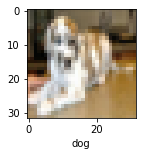

In [61]:
plot_sample(X_train, y_train, 1111)

In [62]:
X_train = X_train/255
X_test = X_test/255

In [63]:
# Artificial Neural Network
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')    
])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.8164 - accuracy: 0.3516
Epoch 2/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6279 - accuracy: 0.4243
Epoch 3/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5452 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 79s 51ms/step - loss: 1.4855 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 6044s 4s/step - loss: 1.4376 - accuracy: 0.4958


In [64]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [65]:
print("Classification report: \n ", classification_report(y_test, y_pred_classes))

Classification report: 
                precision    recall  f1-score   support

           0       0.62      0.44      0.51      1000
           1       0.41      0.80      0.54      1000
           2       0.49      0.16      0.24      1000
           3       0.32      0.45      0.38      1000
           4       0.39      0.49      0.43      1000
           5       0.51      0.18      0.26      1000
           6       0.46      0.58      0.52      1000
           7       0.63      0.44      0.52      1000
           8       0.52      0.69      0.59      1000
           9       0.51      0.37      0.43      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.44     10000
weighted avg       0.49      0.46      0.44     10000



In [66]:
# Convulation Neural Network
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax') #softmax is used to normalize probability    
])

In [67]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [68]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 1117s 715ms/step - loss: 1.4802 - accuracy: 0.4679
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1073 - accuracy: 0.6135
Epoch 3/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9804 - accuracy: 0.6590
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8986 - accuracy: 0.6878
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8360 - accuracy: 0.7102
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7798 - accuracy: 0.7302
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7276 - accuracy: 0.7469
Epoch 8/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6851 - accuracy: 0.7612
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6413 - accuracy: 0.7745
Epoch 10/10
1563/1563 [==============================] - 56s 

In [70]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9657 - accuracy: 0.6860


[0.9657173752784729, 0.6859999895095825]

In [71]:
X_test[:5]

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]